<a href="https://colab.research.google.com/github/ashishakonnur/Stroke-Predicition/blob/main/Stroke_Prediction_using_ML_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke prediction using ML Classification Algorithms

Build a model that can be used to predict stroke.

## Import Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


from sklearn.inspection import permutation_importance



data = pd.read_csv('https://raw.githubusercontent.com/ashishakonnur/Stroke-Predicition/main/healthcare-dataset-stroke-data.csv')

In [ ]:
#Transpose index and columns
data.head(5).T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67,61,80,49,79
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24



## Data Types & Data Cleaning

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



As shown above, the number of rows (samples) is 5110 and number of columns (variables) is 12. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable. As well as BMI values need to be imputed.

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# no null values to deal with
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


### Missing/NaN values

In [ ]:
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

# remove (drop) data associated with missing values in variable 'smoking_status'
df = data[data['smoking_status'].notnull()]

# drop variable 'id'
df.drop(columns='id',axis=1,inplace=True)

# validate there's no more missing values
miss_val = df.isnull().sum()/len(df)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("Shape of data without missing values: {}".format(df.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
Shape of data without missing values: (5110, 11)


## Changing Category to Numerical Values

In [ ]:
# Check the values of categories
print("Unique 'gender': {}".format(df['gender'].unique()))
print("Unique 'ever_married': {}".format(df['ever_married'].unique()))
print("Unique 'work_type': {}".format(df['work_type'].unique()))
print("Unique 'Residence_type': {}".format(df['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(df['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# create encoder for each categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [ ]:
df['gender'] = label_gender.fit_transform(df['gender'])
df['ever_married'] = label_married.fit_transform(df['ever_married'])
df['work_type']= label_work.fit_transform(df['work_type'])
df['Residence_type']= label_residence.fit_transform(df['Residence_type'])
df['smoking_status']= label_smoking.fit_transform(df['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(df.head(6).T)

                        0           1       2       3       4       5
gender               1.00    0.000000    1.00    0.00    0.00    1.00
age                 67.00   61.000000   80.00   49.00   79.00   81.00
hypertension         0.00    0.000000    0.00    0.00    1.00    0.00
heart_disease        1.00    0.000000    1.00    0.00    0.00    0.00
ever_married         1.00    1.000000    1.00    1.00    1.00    1.00
work_type            2.00    3.000000    2.00    2.00    3.00    2.00
Residence_type       1.00    0.000000    0.00    1.00    0.00    1.00
avg_glucose_level  228.69  202.210000  105.92  171.23  174.12  186.21
bmi                 36.60   28.893237   32.50   34.40   24.00   29.00
smoking_status       1.00    2.000000    2.00    3.00    2.00    1.00
stroke               1.00    1.000000    1.00    1.00    1.00    1.00


- Unique 'gender': ['Male' 'Female' 'Other'][0,1,2]
- Unique 'ever_married': ['Yes' 'No'][0,1]
- Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']0,1,2,3,4]
- Unique 'Residence_type': ['Urban' 'Rural'][0,1]
- Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown'][0,1,2,3]

The data here looks good so far. Do check if anything else need to be done.

# Descriptive Analytics

## Correlation of features

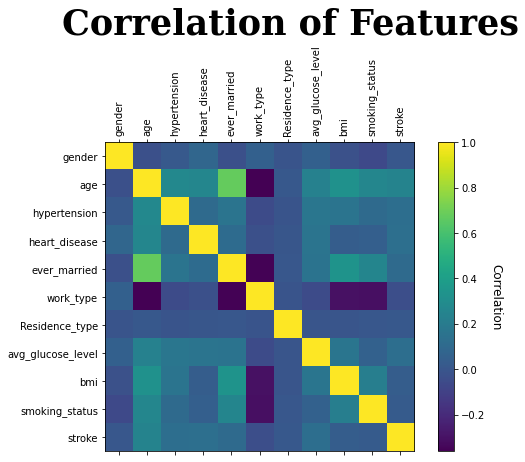

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(df.corr())
ax.set_xticks(np.arange(df.shape[1]))
ax.set_yticks(np.arange(df.shape[1]))
ax.set_xticklabels(df.columns,rotation=90)
ax.set_yticklabels(df.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
fig.text(0.20,1,'Correlation of Features',{'fontname':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

Useful to measure the inter-feature correlation.
- 'ever_married' and 'age' seem to have positive correlation
- 'work_type' and 'age'
- 'work_type' and 'marriage'

Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

## Histogram of features

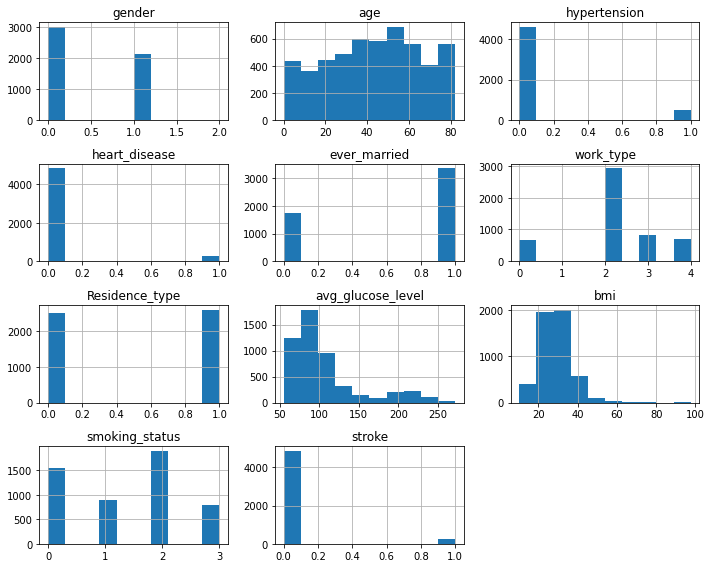

In [ ]:
fig = df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

## Pie Chart of Stroke Data

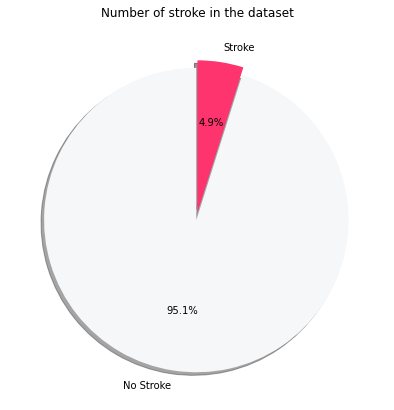

In [ ]:
# We want to have general understanding of Dataset, by find

labels = ['No Stroke','Stroke']
sizes = df['stroke'].value_counts(sort = True)

colors = ["#f6f7f9","#fe346e"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

The class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

# Data Preprocessing

## Handling Imbalanced Data

* There are several techniques that can be used to handle highly imbalanced class. This article nicely summarises those different techniques. In this dataset, we are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE), by synthesising new samples from the minority class to have the same number of samples as the majority class (illustrated in figure below). 
* Oversampling technique is chosen because we do not want to loose significant amount of information (95.1%) as if we use undersampling technique.

[Imbalanced data technique](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)

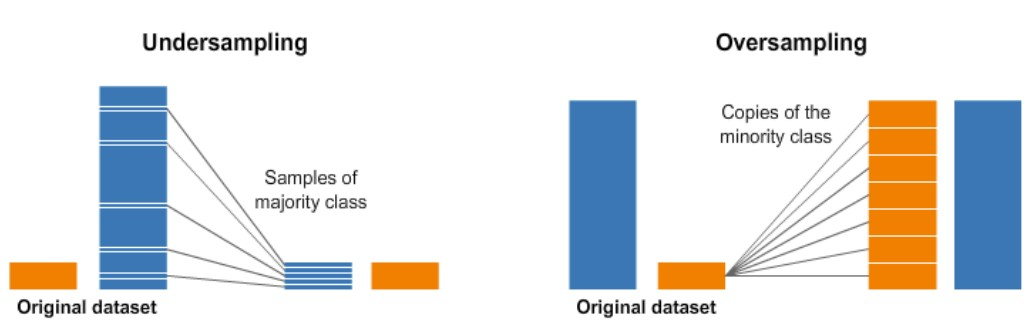

In [ ]:
from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_sample(df.loc[:,df.columns!='stroke'], df['stroke'])
print("Shape of X_Train: {}".format(X.shape)) # every column except Stroke Column
print("Shape of y_Train: {}".format(y.shape)) # Only Stroke column

Shape of X_Train: (9722, 10)
Shape of y_Train: (9722,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


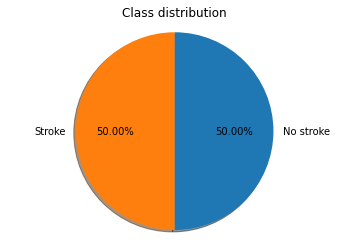

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [ ]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

## Split Data into Train, Test and Validate

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3888 | # class 1: 3888
[valid] # class 0: 486 | # class 1: 487
[test]  # class 0: 487 | # class 1: 486


## Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

[Why Normalization is necessary](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

# ML Model Training and Evaluation


We will implement and benchmark the performance of the following 7 ML algorithms:

1. Singular Vector Machine (SVM)
2. Gaussian Naive Bayes (GNB)
3. Logistic Regression (LR)
4. Decision Tree (DT)
5. Random Forest (RF)
6. LightGBM (LGBM)
7. XGboost (XGB)


##Performance Metrics
The peformance will be evaluated based on two different groups of metrics:

1. Sensitivity, specificity, and area under the curve (AUC)
2. Precision, recall, and F1 score

In [ ]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    # calculate the sensitivity
    sensitivity = TP / (TP + FN) 

    # calculate the specificity
    specificity = TN / (TN + FP)
    
    return sensitivity,specificity

## ML Models:

### Singular Vector Machine (SVM)

In [ ]:
import time as timer
from sklearn.svm import SVC

start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()

print("Finished training within {:.2f} seconds".format(end-start))

# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 6.43 seconds


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       487
           1       0.92      0.90      0.91       486

    accuracy                           0.91       973
   macro avg       0.91      0.91      0.91       973
weighted avg       0.91      0.91      0.91       973

Confusion matrix for SVM: 
[[449  38]
 [ 47 439]]
Accuracy score for SVM: 0.91
Precision score for SVM: 0.92
Recall score for SVM: 0.90
F1 score for SVM: 0.91
Sensitivity score for SVM: 0.90
Specitivity score for SVM: 0.92
AUC score for SVM: 0.98


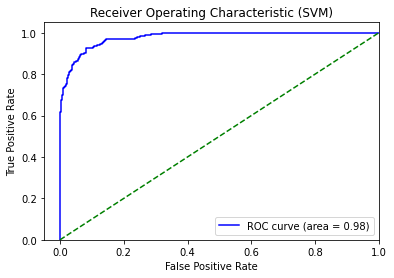

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score


print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))

# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

###Gaussian Naive Bayes (GNB)

###Logistic Regression (LR)

###Decision Tree (DT)

###Random Forest (RF)

###LightGBM (LGBM)

###XGboost (XGB)

##Performance Benchmark Across Models


##Selecting Most Important Features